In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
# %matplotlib inline

In [3]:
# define the function to plot confusion matrix for later use


from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Read the Data

In [5]:
df = pd.read_csv('loan_train.csv')
testdf = pd.read_csv('loan_test.csv')
df.head()
print(df['loan_status'].value_counts())
print(testdf['loan_status'].value_counts())

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64
PAIDOFF       40
COLLECTION    14
Name: loan_status, dtype: int64


In [6]:
# convert dates to date time object format to make it usable
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()
# get the day of the week that the date corresponds to 
df['ef_day'] = df['effective_date'].dt.dayofweek
# pandas dt.dayofweek returns the day of the week corresponding to the date 
# monday is 0 and sunway is 6
df['d_day'] = df['due_date'].dt.dayofweek


# ----------------------repeat for test data--------------

testdf['due_date'] = pd.to_datetime(testdf['due_date'])
testdf['effective_date'] = pd.to_datetime(testdf['effective_date'])
testdf.head()
# get the day of the week that the date corresponds to 
testdf['ef_day'] = testdf['effective_date'].dt.dayofweek
# pandas dt.dayofweek returns the day of the week corresponding to the date 
# monday is 0 and sunway is 6
testdf['d_day'] = testdf['due_date'].dt.dayofweek
testdf.head()
# df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,ef_day,d_day
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,4
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,3
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,6
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,6
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,6


<Figure size 432x288 with 0 Axes>

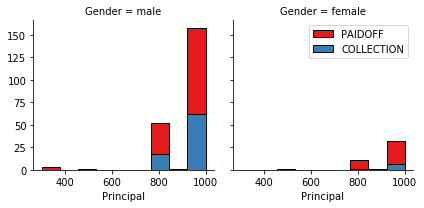

<Figure size 432x288 with 0 Axes>

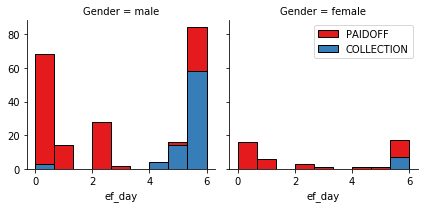

<Figure size 432x288 with 0 Axes>

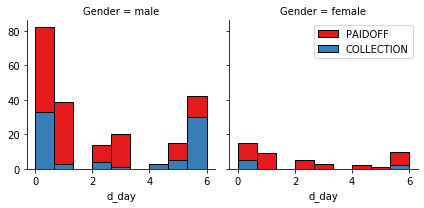

<Figure size 432x288 with 0 Axes>

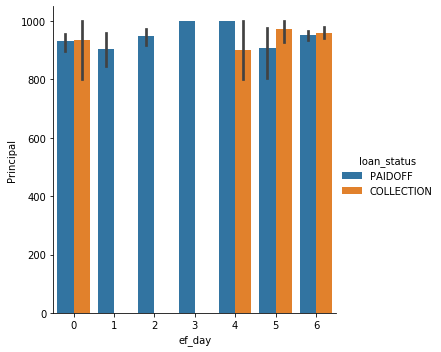

In [7]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10) 
#10 points b/w min and max principal
plt.figure(1)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
# FacetGrid maps a dataset onto a grid that correspond to the levels of variables in the data
# pallette is the color palette
# hue allows you to add a third dimension to the plot (adds loan status as a color)
# col wrap wraps the column facets at 2

g.map(plt.hist, 'Principal', bins=bins, ec="k")
# g.map lets you specify the data to plot (principal)... axes label

g.axes[-1].legend() 
# 0 moves the legend to the left

plt.show(1)


plt.figure(2)
bins = np.linspace(df.ef_day.min(), df.ef_day.max(), 10)
# create bins

g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
# gender column, loan status as the third dimension in colors

g.map(plt.hist, 'ef_day', bins=bins, ec="k")
# plot days of the week

g.axes[-1].legend()
plt.show(2)

plt.figure(3)
bins = np.linspace(df.d_day.min(), df.d_day.max(), 10)
# create bins

g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
# gender column, loan status as the third dimension in colors

g.map(plt.hist, 'd_day', bins=bins, ec="k")
# plot days of the week

g.axes[-1].legend()
plt.show(3)

plt.figure(4)

xx = 'Principal'
yy = 'ef_day'
sns.catplot(x=yy,
            y=xx,data=df,
            kind='bar',
            hue = 'loan_status')


plt.show(4)

<Figure size 432x288 with 0 Axes>

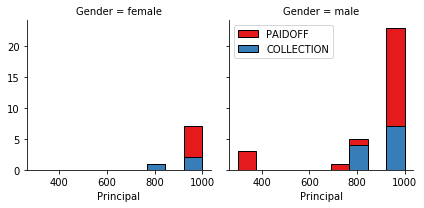

<Figure size 432x288 with 0 Axes>

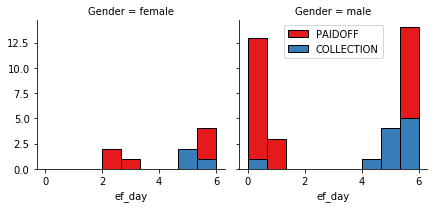

<Figure size 432x288 with 0 Axes>

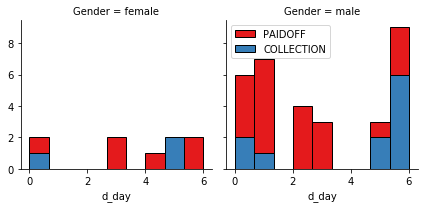

<Figure size 432x288 with 0 Axes>

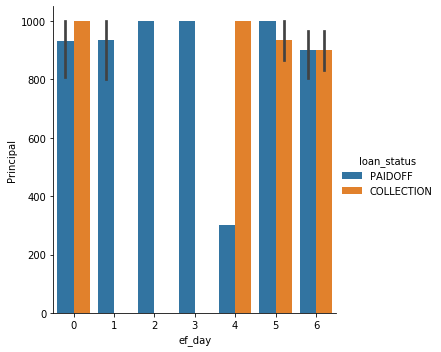

In [36]:
bins = np.linspace(testdf.Principal.min(), testdf.Principal.max(), 10) 
#10 points b/w min and max principal
plt.figure(1)
g = sns.FacetGrid(testdf, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
# FacetGrid maps a dataset onto a grid that correspond to the levels of variables in the data
# pallette is the color palette
# hue allows you to add a third dimension to the plot (adds loan status as a color)
# col wrap wraps the column facets at 2

g.map(plt.hist, 'Principal', bins=bins, ec="k")
# g.map lets you specify the data to plot (principal)... axes label

g.axes[-1].legend() 
# 0 moves the legend to the left

plt.show(1)


plt.figure(2)
bins = np.linspace(testdf.ef_day.min(), testdf.ef_day.max(), 10)
# create bins

g = sns.FacetGrid(testdf, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
# gender column, loan status as the third dimension in colors

g.map(plt.hist, 'ef_day', bins=bins, ec="k")
# plot days of the week

g.axes[-1].legend()
plt.show(2)

plt.figure(3)
bins = np.linspace(testdf.d_day.min(), testdf.d_day.max(), 10)
# create bins

g = sns.FacetGrid(testdf, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
# gender column, loan status as the third dimension in colors

g.map(plt.hist, 'd_day', bins=bins, ec="k")
# plot days of the week

g.axes[-1].legend()
plt.show(3)

plt.figure(4)

xx = 'Principal'
yy = 'ef_day'
sns.catplot(x=yy,
            y=xx,data=testdf,
            kind='bar',
            hue = 'loan_status')


plt.show(4)

In [8]:
# Feature binarization to set a threshold values less then day 4 people who get the loan at the end of the week dont pay it off,
df['weekend'] = df['ef_day'].apply(lambda x: 1 if (x>3)  else 0)
df['midweek'] = df['d_day'].apply(lambda x: 1 if (1<x<5)  else 0)
df.head()
# now we can drop the due_date and day, ef day and date from the feature list
# education is not used because it is inconclusive

# first convert gender to binary 0 or 1
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)


features = df[['Principal','terms','Gender','weekend','midweek','age']]

# --------------------repeat for test data----------------------------

# Feature binarization to set a threshold values less then day 4 people who get the loan at the end of the week dont pay it off,
testdf['weekend'] = testdf['ef_day'].apply(lambda x: 1 if (x>3)  else 0)
testdf['midweek'] = testdf['d_day'].apply(lambda x: 1 if (1<x<5)  else 0)
testdf.head()
# now we can drop the due_date and day, ef day and date from the feature list
# education is not used because it is inconclusive

# first convert gender to binary 0 or 1
testdf['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)


testfeatures = testdf[['Principal','terms','Gender','weekend','midweek','age']]

features.head()

,Principal,terms,Gender,weekend,midweek,age
0,1000,30,0,0,1,45
1,1000,30,1,0,1,33
2,1000,15,0,0,1,27
3,1000,30,1,1,0,28
4,1000,30,0,1,0,29


In [9]:
x = features
x= preprocessing.StandardScaler().fit(x).transform(x)
y = df['loan_status'].values

# ----------------repeat for test---------------------
testx = testfeatures
testx= preprocessing.StandardScaler().fit(testx).transform(testx)
testy = testdf['loan_status']
print(testx.shape,x.shape)
print(testy.shape,y.shape)

# they are equal featuresizes :))))))

(54, 6) (346, 6)
(54,) (346,)


# Training

### Split the training data into train test split to select the best model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

xtr, xte, ytr, yte = train_test_split( x, y, test_size=0.2, random_state=650)
print ('Train set:', xtr.shape, ytr.shape)
print ('Test set:', xte.shape,  yte.shape)

Train set: (276, 6) (276,)
Test set: (70, 6) (70,)


### KNN

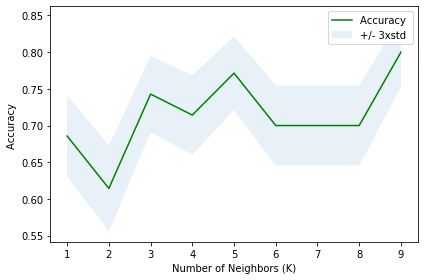

The best k is:  9


In [14]:
from sklearn.neighbors import KNeighborsClassifier

# let the no. of k's be 10
Ks = 10

# initialize the mean and std accuracy, confusion matrix
knnmeanAcc = np.zeros((Ks-1))
stdAcc = np.zeros((Ks-1))

for i in range(1,Ks):
    
    #Train Model for each i
    knnModel = KNeighborsClassifier(n_neighbors = i).fit(xtr,ytr)
    
    #predict yhat on test data
    knnyhat = knnModel.predict(xte)
    
    #Calc Mean and Std Accuracy
    knnmeanAcc[i-1] = metrics.accuracy_score(yte, knnyhat)
    stdAcc[i-1]=np.std(knnyhat==yte)/np.sqrt(knnyhat.shape[0])

plt.plot(range(1,Ks),knnmeanAcc,'g')
plt.fill_between(range(1,Ks),knnmeanAcc - 1 * stdAcc,knnmeanAcc + 1 * stdAcc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

# Select k as index of the max value of the meanAcc
k= knnmeanAcc.argmax()+1
print('The best k is: ',k)


In [15]:

knnModel = KNeighborsClassifier(n_neighbors = k).fit(xtr,ytr)
knnY = knnModel.predict(xte)

print("Train set Accuracy: ", metrics.accuracy_score(ytr, knnModel.predict(xtr)))
print("Test set Accuracy: ", metrics.accuracy_score(yte, knnY))

Train set Accuracy:  0.7971014492753623
Test set Accuracy:  0.8


## Decision Tree

In [16]:


from sklearn.tree import DecisionTreeClassifier

depths = 10
treemeanAcc = np.zeros((depths-1))

for i in range(1,depths):
    
        #Train Model for each i
        treeModel = DecisionTreeClassifier(criterion="entropy",max_depth=i)
        treeModel.fit(xtr,ytr)
        
        #predict yhat on test data
        treeY = treeModel.predict(xte) #predTree is yhat
        
        #Calc Mean and Std Accuracy
        treemeanAcc[i-1] = metrics.accuracy_score(yte, treeY)


# choose the depth value that results in the highest acc
depthVal= treemeanAcc.argmax()+1
print('meanAcc List: ', treemeanAcc) 
print('Highest Accuracy of %.2f at depth value %d' %(max(treemeanAcc),depthVal))


treeModel = DecisionTreeClassifier(criterion="entropy",max_depth=depthVal)
treeModel.fit(x,y) #fit on the whole training data after choosing an appropriate model

meanAcc List:  [0.8        0.8        0.8        0.8        0.8        0.65714286
 0.7        0.71428571 0.74285714]
Highest Accuracy of 0.80 at depth value 1


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

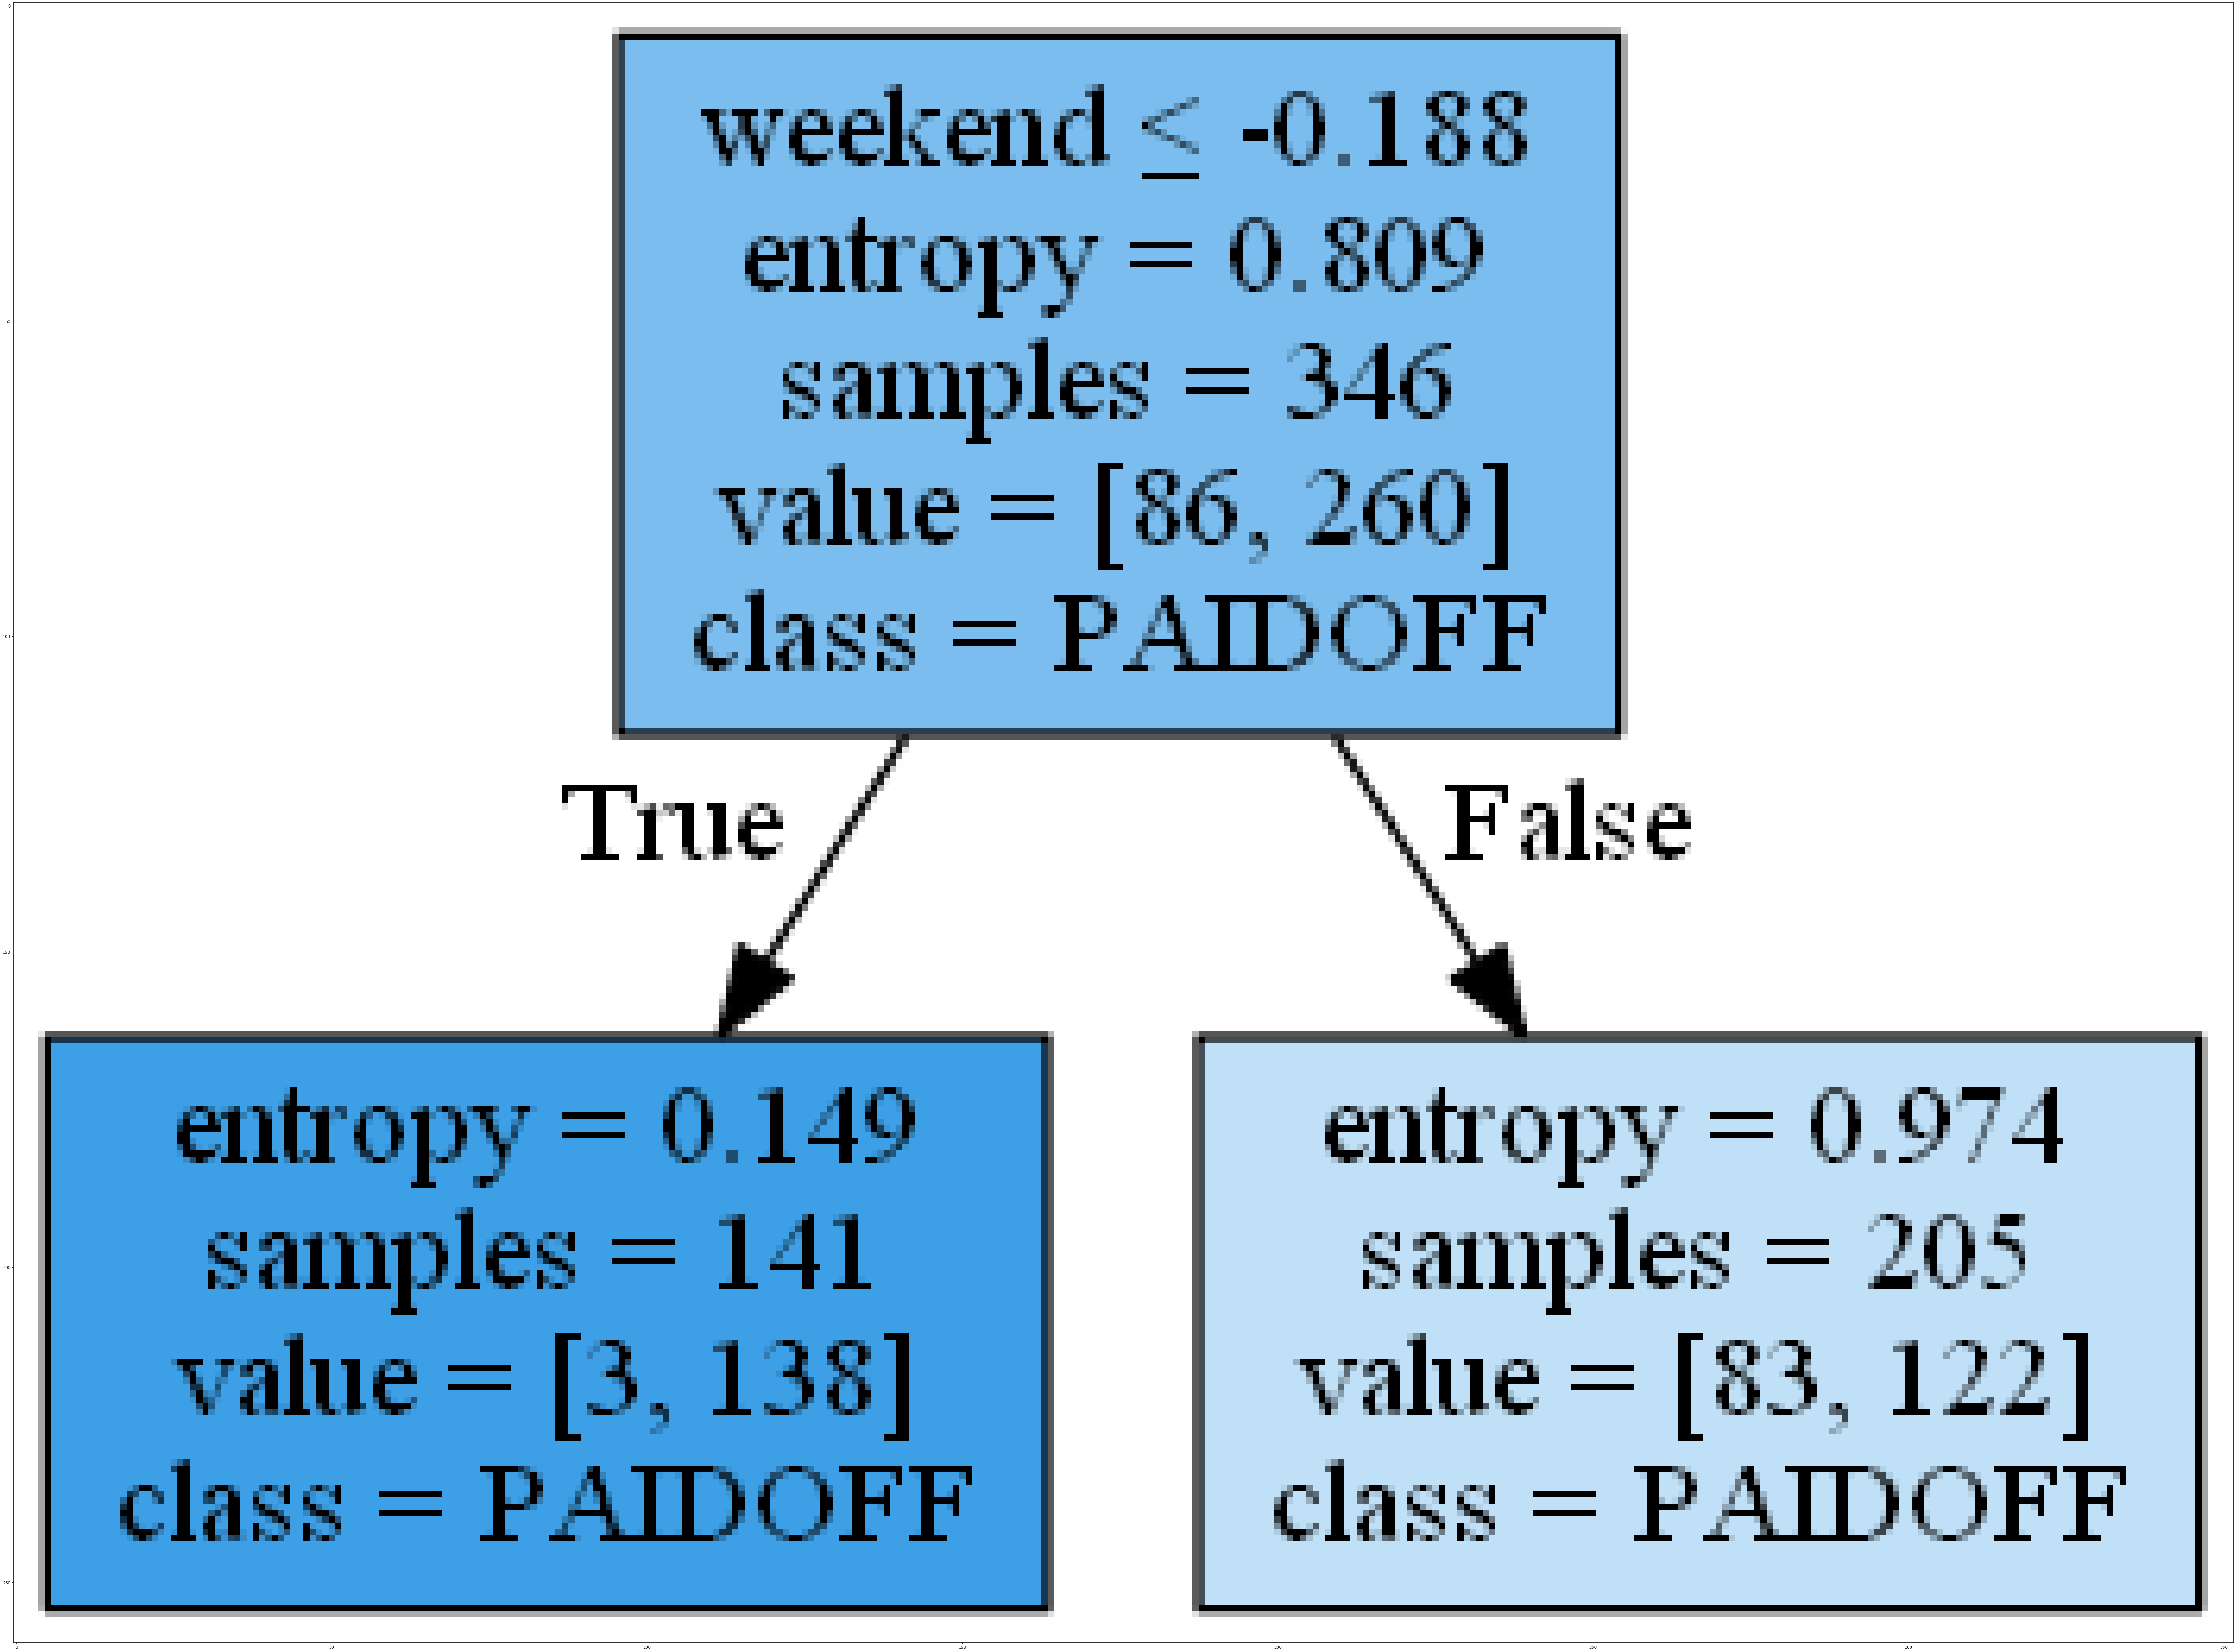

In [19]:
# ######## to visualize (needs to be adjusted to vble names)
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before

# !conda install -c conda-forge pydotplus -y
# !conda install -c conda-forge python-graphviz -y

# visualizing the decision tree

from sklearn import tree
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg

%matplotlib inline 
treeDot = StringIO() #output dot file name
filename = "loanTree.png"
featureNames = features.columns 

# your target aka loan status
targetNames = df["loan_status"].unique().tolist()

# export Model as a dot file (a GraphViz representation of a decision tree)
out =tree.export_graphviz(treeModel, #the model created
                          feature_names=featureNames, #the features
                          out_file=treeDot, #output dot file name
                          class_names= np.unique(ytr), 
                          filled=True,  
                          special_characters=True,
                          rotate=False)  

# convert the dot file into png so we can view it
graph = pydotplus.graph_from_dot_data(treeDot.getvalue())  

graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

## Support Vector Machine

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy on unseen train data:  0.8
              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        14
     PAIDOFF       0.80      1.00      0.89        56

    accuracy                           0.80        70
   macro avg       0.40      0.50      0.44        70
weighted avg       0.64      0.80      0.71        70

Confusion matrix, without normalization
[[ 0 14]
 [ 0 56]]


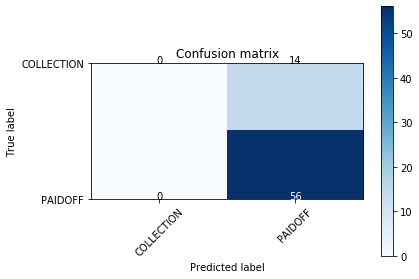

In [78]:

from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools

svmModel = svm.SVC(kernel='rbf') #,C = 0.01, gamma='scale')
svmModel.fit(xtr, ytr) 

svmY = svmModel.predict(xte)
print('Accuracy on unseen train data: ',jaccard_similarity_score(yte, svmY))
    
cfMat = confusion_matrix(yte, svmY) #, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(yte, svmY))
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cfMat, classes=['COLLECTION','PAIDOFF'],normalize= False,  title='Confusion matrix')

## Logistic Regression

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

lrModel = LogisticRegression(C=0.05,solver='lbfgs').fit(x,y)
lrY = lrModel.predict(xte)
lrYprob = lrModel.predict_proba(xte)

print("Unseen train data Accuracy: ", metrics.accuracy_score(yte, lrY))
print('Log Loss: ',log_loss(yte,lrYprob))


Unseen train data Accuracy:  0.8
Log Loss:  0.410489561726884


# Testing

In [86]:
from sklearn.metrics import log_loss
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import itertools

#### KNN

In [128]:
# Test on the actual Test data
knnYhat = knnModel.predict(testx)
print('Jaccard: %.4f'% jaccard_similarity_score(testy, knnYhat))
print('F1: %.4f'% f1_score(testy, knnYhat, average='weighted') )

Jaccard: 0.7037
F1: 0.6119


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


#### Decision Tree

In [127]:
treeYhat = mytree.predict(testx) #predict test data

print('Jaccard: %.4f'% jaccard_similarity_score(testy, treeYhat))
print('F1: %.4f'% f1_score(testy, treeYhat, average='weighted') )

Jaccard: 0.7407
F1: 0.6304


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### SVM

Accuracy: 0.7222
Jaccard: 0.7222
F1: 0.6213
Confusion matrix, without normalization
[[ 0 14]
 [ 0 56]]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


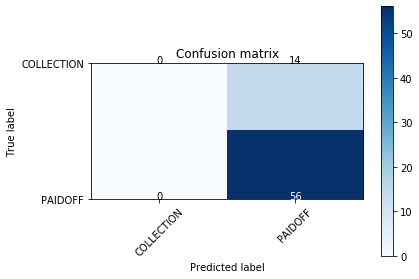

In [123]:
svmYhat = svmModel.predict(testx)

print('Jaccard: %.4f'% jaccard_similarity_score(testy, svmYhat))
print('F1: %.4f'% f1_score(testy, svmYhat, average='weighted') )


svmCF = confusion_matrix(testy, svmYhat)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cfMat, classes=['COLLECTION','PAIDOFF'],normalize= False,  title='Confusion matrix')


#### Logistic Regression

In [121]:
lrYhat = lrModel.predict(testx)
lrYprobhat = lrModel.predict_proba(testx)

print('Jaccard: %.4f'% jaccard_similarity_score(testy, lrYhat))
print('F1: %.4f'% f1_score(testy, lrYhat, average='weighted'))
print('Log Loss: %.4f'%log_loss(testy,lrYprobhat))

Jaccard: 0.7407
F1: 0.6304
Log Loss: 0.4901


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
